# Random Forest Notebook
Attempting to implement random forrest algorithm for research and performance
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://data36.com/random-forest-in-python/

### Some info from good ol' ChatGPT
Random Forest is an ensemble learning method that uses multiple decision trees to make predictions. Here's how it works:

    Building the trees: Random Forest constructs a set of decision trees, each of which is trained on a random subset of the input features and a random subset of the data points. The tree is grown by recursively splitting the data into subsets based on the values of the input features.

    Making predictions: To make a prediction for a new data point, Random Forest takes the average of the predictions of all the trees in the forest. Each tree produces a prediction based on the input features and the subset of data it was trained on.

    Handling missing data: Random Forest can handle missing data in the input features by using surrogate splits. If a data point is missing a value for a particular feature, the algorithm can use a different feature that is highly correlated with the missing feature to make a split in the decision tree.

    Handling imbalanced data: Random Forest can also handle imbalanced data by using class weights or resampling techniques to ensure that each class is represented in the training data.

Random Forest has several advantages over other machine learning algorithms. It is robust to noise and missing data, can handle both continuous and categorical input features, and can be used for both regression and classification problems. However, there are some things to be aware of when using Random Forest:

    Interpretability: Random Forest can be difficult to interpret, as the resulting model is a combination of many individual decision trees. It can be hard to understand which input features are most important for making predictions.

    Overfitting: Random Forest can be prone to overfitting if the trees are too deep or if the number of trees in the forest is too high. Regularization techniques, such as limiting the depth of the trees or using a smaller number of trees, can help prevent overfitting.

    Computationally expensive: Random Forest can be computationally expensive to train and evaluate, especially for large datasets with many input features. It is important to use efficient algorithms and data structures to reduce the training time and memory usage.

Overall, Random Forest is a powerful and versatile algorithm that can be effective for many machine learning problems.

### Todo:
Understand and improve RF Model
Implement vectorisation model
Abstract data processing and filtering/wrangling to function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import time

In [2]:
x_train_original = pd.read_csv(r"book_rating_train.csv", index_col = False, delimiter = ',', header=0)
train_corpus_name = x_train_original['Name']
test_name = x_train_original['Name']
label_train = x_train_original["rating_label"]
# Alternative name, cause I'm lazy
Y = label_train
x_train_original

,Name,Authors,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,Description,rating_label
0,Best of Dr Jean: Reading & Writing,Jean R. Feldman,2005,6,1,Teaching Resources,NaN,48,Teachers will turn to this treasury of ideas a...,4.0
1,Here All Dwell Free,Gertrud Mueller Nelson,1991,10,1,DoubleDay,NaN,364,Every human being lives a fairy tale -- an unc...,4.0
2,Boomer's Big Surprise,Constance W. McGeorge,2005,3,31,Chronicle Books,NaN,32,<i>Boomer's Big Surprise</i> will have special...,4.0
3,"I'll Go and Do More: Annie Dodge Wauneka, Nava...",Carolyn Niethammer,2004,9,1,Bison Books,NaN,293,<i>I'll Go and Do More</i> is the story of Ann...,4.0
4,Us,Richard Mason,2005,7,7,Penguin Books Ltd,eng,352,"Since their days at Oxford, they've gone their...",3.0
...,...,...,...,...,...,...,...,...,...,...
23058,Black Coffee Blues,Henry Rollins,1997,8,1,2.13.61,eng,120,"""If I lose the light of the sun, I will write ...",4.0
23059,America's Champion Swimmer: Gertrude Ederle,David A. Adler,2005,6,1,HMH Books for Young Readers,NaN,32,"Trudy Ederle loved to swim, and she was determ...",4.0
23060,Crime and Custom in Savage Society,Bronisław Malinowski,1989,2,15,Rowman & Littlefield Publishers,NaN,132,Bronislaw Malinowski achieved international re...,4.0
23061,The Name and Nature of Poetry and Other Select...,A.E. Housman,1998,4,21,New Amsterdam Books,NaN,136,Lovers of Housman's poetry and admirers of his...,4.0


In [3]:
X = x_train_original.iloc[:,:-1]
Y = label_train
X, Y

(                                                    Name  \
 0                     Best of Dr Jean: Reading & Writing   
 1                                    Here All Dwell Free   
 2                                  Boomer's Big Surprise   
 3      I'll Go and Do More: Annie Dodge Wauneka, Nava...   
 4                                                     Us   
 ...                                                  ...   
 23058                                 Black Coffee Blues   
 23059        America's Champion Swimmer: Gertrude Ederle   
 23060                 Crime and Custom in Savage Society   
 23061  The Name and Nature of Poetry and Other Select...   
 23062                            Redemption (Sevens, #7)   
 
                       Authors  PublishYear  PublishMonth  PublishDay  \
 0             Jean R. Feldman         2005             6           1   
 1      Gertrud Mueller Nelson         1991            10           1   
 2       Constance W. McGeorge         2005    

In [4]:
# Gets the data types, and removes all int data types
X_string = X.select_dtypes(exclude="number")
X_train_number = X.select_dtypes(include="number")

In [5]:
clf = rfc(max_depth=2, random_state=0)
clf.fit(X_train_number, Y)

RandomForestClassifier(max_depth=2, random_state=0)

In [6]:
print(clf.predict([[0, 0, 0, 0]]))

[4.]


C:\Users\harri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
# Importing test data and formatting it
x_test_original = pd.read_csv(r"book_rating_test.csv", index_col = False, delimiter = ',', header=0)
test_corpus_name = x_test_original['Name']
# Alternative name, cause I'm lazy
x_test_original

,Id,Name,Authors,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,Description
0,1,Near Occasions of Grace,Richard Rohr,1993,1,1,Orbis Books,NaN,118,Distilling the insights of more than 20 years ...
1,2,The Perfect Spot,Robert J. Blake,1997,3,17,Puffin,NaN,32,A surprising turn on a wilderness walk leads t...
2,3,Study Guide for Campbell Reece Biology,Martha R. Taylor,2005,1,1,Benjamin Cummings,eng,544,This printed learning aid provides a concept m...
3,4,"To Rescue A Rogue (Company of Rogues, #12)",Jo Beverley,2006,9,5,Signet,eng,432,Lady Mara St. Bride has never backed down from...
4,5,Soul Picnic: The Music and Passion of Laura Nyro,Michele Kort,2002,5,3,Thomas Dunne Books,NaN,352,<i>Soul Picnic: The Music and Passion of Laura...
...,...,...,...,...,...,...,...,...,...,...
5761,5762,"The Wicca Herbal: Recipes, Magick, and Abundance",Jamie Martinez Wood,2003,9,1,Ten Speed Press,NaN,274,This work details and demystifies 100 magical ...
5762,5763,Shifter's Desire: Vampire Fangs & Venom,Myra Nour,2004,9,10,Ellora's Cave,NaN,224,Shifters' Desire - Vampire Fangs and Venom By ...
5763,5764,El Metodo Silva de Control Mental,José Silva,1999,12,14,Editorial Diana,NaN,224,El método Silva de Control Mental es un sistem...
5764,5765,Renaissance and Renascences in Western Art,Erwin Panofsky,1972,6,21,Westview Press,eng,242,<i>Renaissance and Renascences in Western Art<...


In [8]:
# Gets the data types, and removes all int data types
X_test_string = x_test_original.select_dtypes(exclude="number")
X_test_number = x_test_original.select_dtypes(include="number")

In [9]:
X_test = X_test_number.iloc[:,1:]

In [10]:
predictions = clf.predict(X_test)
predictions

array([4., 4., 4., ..., 4., 4., 4.])

In [11]:
describe_data = pd.DataFrame(predictions)
describe_data.describe()

,0
count,5766.0
mean,4.0
std,0.0
min,4.0
25%,4.0
50%,4.0
75%,4.0
max,4.0


In [12]:
Y.describe()

count    23063.000000
mean         3.788709
std          0.502590
min          3.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating_label, dtype: float64

In [72]:
doc2vec_data_source = "book_text_features_doc2vec"
# Maybe replace names of 0, 1, 2 etc with word vector i
# can't do random forrest with float64, need int64
authors_d2v_test = pd.read_csv(f"{doc2vec_data_source}/test_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
authors_d2v_train = pd.read_csv(f"{doc2vec_data_source}/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)

desc_d2v_test = pd.read_csv(f"{doc2vec_data_source}/test_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
desc_d2v_train = pd.read_csv(f"{doc2vec_data_source}/train_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

name_d2v_test = pd.read_csv(f"{doc2vec_data_source}/test_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
name_d2v_train = pd.read_csv(f"{doc2vec_data_source}/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

In [61]:
# Now trying with all the funky doc2vec features
# Due to NAN, select only up to line 20533
# Convert to float
X_train_number = X_train_number
X_concat_train = pd.concat([X_train_number, authors_d2v_train], axis=1)
# print(X_train_number.shape, authors_d2v_train.shape)
X_concat_train = X_concat_train.iloc[:20532, :]

X_concat_train.isnull()
Y = Y.iloc[:20532]
X_concat_train

,PublishYear,PublishMonth,PublishDay,pagesNumber,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,2005.0,6.0,1.0,48.0,0.359375,-0.096944,0.021326,0.304888,-0.084434,-0.138658,...,0.329671,0.343979,0.018261,0.115687,-0.111172,0.068306,0.158065,0.053510,-0.136804,-0.084448
1,1991.0,10.0,1.0,364.0,-0.074845,0.060063,0.132891,0.051957,0.127083,0.017997,...,0.400349,0.065201,0.349188,0.020555,0.281087,0.231422,0.129853,-0.213233,-0.081253,-0.204687
2,2005.0,3.0,31.0,32.0,-0.127589,-0.100911,0.158580,0.046532,-0.065661,-0.037972,...,0.225617,-0.004355,0.173353,0.087015,0.106534,0.040950,0.209152,-0.215313,-0.177547,-0.178094
3,2004.0,9.0,1.0,293.0,-0.000472,-0.048197,0.106046,-0.100795,-0.147681,-0.017288,...,0.133304,-0.069995,0.206028,0.089625,0.157605,0.131767,0.244849,-0.321698,-0.198365,-0.208098
4,2005.0,7.0,7.0,352.0,-0.162106,-0.023212,0.189444,-0.042658,-0.117135,-0.075968,...,0.224210,0.049880,0.003623,0.062291,-0.030742,0.130882,0.295086,-0.061550,-0.244197,-0.272161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,2003.0,7.0,1.0,288.0,-0.023482,0.171269,0.039030,0.165691,-0.019875,0.094746,...,0.163775,-0.126151,0.309637,0.105771,0.047786,-0.102548,-0.085310,-0.009951,-0.234621,0.094623
20528,1980.0,12.0,1.0,282.0,-0.125423,-0.096064,0.112372,0.135919,0.067934,-0.105393,...,0.226796,-0.184931,0.276709,0.198861,0.125018,0.058177,0.158847,-0.152801,-0.059564,-0.203510
20529,2000.0,1.0,28.0,234.0,-0.109529,-0.094654,0.105830,0.060867,-0.008556,-0.084853,...,0.220805,-0.009626,0.187656,0.068309,0.137829,0.078564,0.121936,-0.204151,-0.177845,-0.177332
20530,1985.0,9.0,1.0,138.0,-0.120171,-0.066444,0.049254,0.114427,-0.130496,-0.046185,...,0.146138,-0.054229,0.136021,0.042794,0.029902,-0.040795,0.002298,-0.159754,-0.106559,0.006371


In [62]:
# Now trying with all the funky doc2vec features
# X_test_number = X_test_number.astype("float32")
X_concat_test = pd.concat([X_test_number, authors_d2v_test], axis=1)
print(X_test_number.shape, authors_d2v_test.shape)
X_concat_test = X_concat_test.iloc[:, 1:]
X_concat_test

(5766, 5) (5766, 20)


,PublishYear,PublishMonth,PublishDay,pagesNumber,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,1993,1,1,118,-0.130635,-0.043828,0.181181,0.063403,-0.106636,-0.094421,...,0.285141,0.044055,0.119470,0.052096,0.047779,0.100110,0.264468,-0.121419,-0.270422,-0.278139
1,1997,3,17,32,-0.229705,0.060092,0.281760,0.265601,0.058149,-0.156851,...,0.090528,0.059376,-0.145990,0.000095,0.220639,0.018507,0.249945,-0.158541,-0.068772,-0.261971
2,2005,1,1,544,-0.037049,0.002935,0.008489,0.044930,-0.032431,0.044135,...,0.032020,-0.032366,0.312061,-0.000559,0.055635,0.026440,-0.024448,-0.054716,-0.105350,0.136251
3,2006,9,5,432,-0.163053,-0.055689,-0.115848,0.048132,0.011586,0.017302,...,0.364054,-0.137073,-0.032434,-0.079422,-0.149948,-0.062775,0.115645,0.064223,0.178038,-0.042513
4,2002,5,3,352,-0.124299,-0.081714,0.162014,0.133565,-0.050241,-0.097250,...,0.258333,-0.044312,0.215498,0.040670,0.104392,-0.011014,0.130587,-0.196958,-0.206644,-0.198721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,2003,9,1,274,-0.218210,-0.160843,0.217717,0.102410,-0.043516,-0.074497,...,0.225692,0.035249,0.106030,0.015311,0.175374,0.024999,0.041783,-0.154681,-0.089381,-0.118790
5762,2004,9,10,224,-0.155716,-0.029530,0.184105,0.127028,-0.076981,-0.064578,...,0.277048,-0.036788,0.240633,0.105743,0.074751,0.010957,0.211900,-0.238442,-0.208417,-0.223700
5763,1999,12,14,224,-0.070730,-0.028579,0.069672,0.082746,-0.055141,-0.088989,...,0.186087,0.003088,0.153609,0.064485,0.060737,0.020799,0.091903,-0.140094,-0.149040,-0.090236
5764,1972,6,21,242,-0.114245,-0.079138,0.139507,0.070903,-0.043835,-0.091562,...,0.242840,-0.005400,0.235775,0.078350,0.127643,0.017677,0.226888,-0.203225,-0.196581,-0.233425


In [63]:
print(X_concat_train.isnull().values.any())
print(X_concat_test.isnull().values.any())

False
False


In [64]:
# Experiment with depth
# Run into issue of data type
# Or maybe a hidden nan value
clf_concat = rfc(max_depth=2, random_state=0)
clf_concat.fit(X_concat_train, Y)

predictions = clf_concat.predict(X_concat_test)
print(predictions)

describe_data = pd.DataFrame(predictions)
describe_data.describe()

C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[4. 4. 4. ... 4. 4. 4.]


C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0
count,5766.0
mean,4.0
std,0.0
min,4.0
25%,4.0
50%,4.0
75%,4.0
max,4.0


In [65]:
def randomForest(x_train=None, x_test=None, y_train=None, y_test=None, num_trees=100, depth=2, state=0):
    clf = rfc(n_estimators=num_trees, max_depth=depth, random_state=state)
    clf.fit(x_train, y_train)

    predictions = clf.predict(x_test)
    # print(predictions)

    describe_data = pd.DataFrame(predictions)
    # print(describe_data.describe())
    
    accuracy = accuracy_score(y_test, predictions)
    # print(accuracy)
    
    return accuracy

In [66]:
# Get data on different values
acc_metrics = pd.DataFrame()

for i in range(10):
    temp_arr = []
    for j in range(5):
        val = j+i
        temp_arr.append(val)
    temp_df = pd.DataFrame(temp_arr, columns=[str(i)])
    acc_metrics = pd.concat([acc_metrics, temp_df], axis=1)
acc_metrics

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,1,2,3,4,5,6,7,8,9,10
2,2,3,4,5,6,7,8,9,10,11
3,3,4,5,6,7,8,9,10,11,12
4,4,5,6,7,8,9,10,11,12,13


In [68]:

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_concat_train, Y, test_size=0.2, random_state=42)

acc_metrics = pd.DataFrame()

for trees in range(0,400,20):
    temp_acc_arr = []
    for depth in range(0, 10, 2):
        temp_acc_arr.append(randomForest(X_train, X_test, y_train, y_test, trees+1, depth+1))
    temp_df = pd.DataFrame(temp_acc_arr, columns=[str(trees)])
    acc_metrics = pd.concat([acc_metrics, temp_df], axis=1)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to run: {elapsed_time:.4f} seconds")

acc_metrics

C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\harri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\harri\anaconda3\lib

Time taken to run: 2681.1647 seconds


,0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380
0,0.708790,0.708790,0.70879,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
1,0.708790,0.708790,0.70879,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
2,0.705138,0.708790,0.70879,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
3,0.698807,0.708546,0.70879,0.708790,0.708790,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546
4,0.682737,0.708790,0.70879,0.709277,0.709277,0.709033,0.709033,0.709277,0.709277,0.709033,0.709277,0.709277,0.709277,0.709033,0.709033,0.709277,0.709033,0.709033,0.708790,0.708790


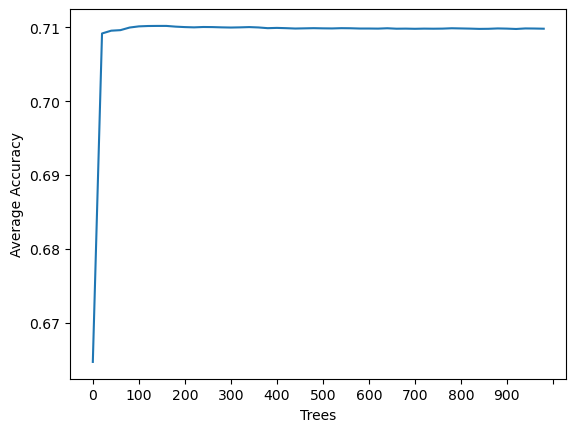

In [59]:
data = []
for score in acc_metrics:
    data.append(acc_metrics[score].mean())

plt.plot(acc_metrics.columns, data)
# xtick label
plt.xticks(range(0, 55, 5))
plt.xlabel("Trees")
plt.ylabel("Average Accuracy")
plt.show()

In [35]:
acc_metrics

,0,20,40,60,80,100,120,140,160,180,...,800,820,840,860,880,900,920,940,960,980
0,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,...,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
1,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,...,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
2,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,...,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
3,0.706842,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,...,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
4,0.705138,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,...,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
5,0.696616,0.708790,0.708790,0.708546,0.708790,0.708546,0.708546,0.708546,0.708546,0.708546,...,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
6,0.698807,0.708546,0.708790,0.708790,0.708790,0.708546,0.708546,0.708546,0.708546,0.708546,...,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546,0.708546
7,0.690772,0.708546,0.708790,0.708546,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,...,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790,0.708790
8,0.682737,0.708790,0.708790,0.709277,0.709277,0.709033,0.709033,0.709277,0.709277,0.709033,...,0.709033,0.709033,0.709033,0.709033,0.709033,0.709033,0.709033,0.709033,0.709033,0.709033
9,0.675676,0.710251,0.709033,0.710007,0.709277,0.709520,0.709277,0.709277,0.709277,0.709764,...,0.709520,0.709520,0.709520,0.709520,0.709277,0.709520,0.709520,0.709520,0.709520,0.709520


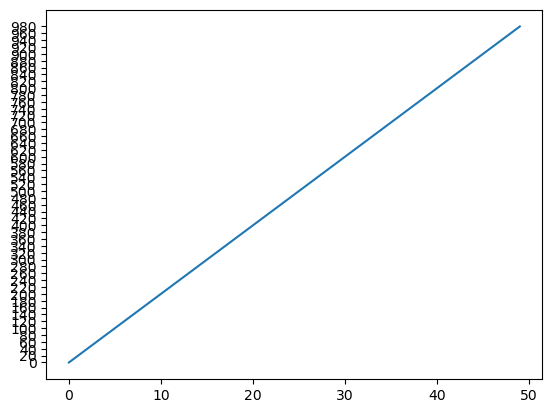

In [41]:
plt.plot(acc_metrics.columns)
plt.show()

In [69]:
# Merging all data together

X = pd.concat([X_concat_train, desc_d2v_train, name_d2v_train], axis=1)
# print(X_train_number.shape, authors_d2v_train.shape)
X = X.iloc[:20532, :]

,PublishYear,PublishMonth,PublishDay,pagesNumber,0,1,2,3,4,5,...,-1.728110462427139282e-01,9.838880598545074463e-02,-6.294104456901550293e-02,1.180574297904968262e-01,-6.537716090679168701e-02,2.279730886220932007e-01,2.188793420791625977e-01,-1.512660235166549683e-01,-4.810495302081108093e-02,3.008219897747039795e-01
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
20528,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
20529,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
20530,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [75]:
x_nan_removed = X.dropna()
# Big flaw I made is dropping rows, need to remove respective nan ones

In [87]:
Y_nan = Y[:x_nan_removed.shape[0]]

In [94]:
x_nan_removed.shape, Y_nan.shape

((1232, 224), (1232,))

1232